# Hand of God Code 2.0 
## Hanan Basheer (20B030018)

### Installing required dependencies and modules

In [181]:
import subprocess

def install(name):
    subprocess.call(['pip', 'install', name])

install("matplotlib sklearn tk seaborn pandas csv serial mouse keyboard")

# Restart Notebook after installations are complete

### Importing required libraries

In [182]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import os
import seaborn as sns
import pandas as pd
import csv
import serial
import time
import keyboard
import mouse
import warnings
from tkinter import *
from PIL import Image, ImageTk
from Graphics import Animations
warnings.filterwarnings('ignore')

### Global Variable definition

In [183]:
push = 0  # Thumb button to push buffer commands through
dt = 0.1
data_list = []

### Arduino Object Creation

In [184]:
# arduino = serial.Serial('COM3', 9600, timeout = dt)

### Interface (Button functions)

In [185]:
def fun1():  # Record Hand Gesture
    def record_gesture_fun():
        avg_list = [0, 0, 0, 0]
        for i in range(100):
            data = "1/2/3/4/5/6/7/8/"  #arduino.readline()
            if (data):
                data = list(map(eval,str(data)[2:-5].split("/")))[0:4]
                data_list.append(data)
                for j in range(len(data)):
                    avg_list[j] += data[j]
                outputs.insert(END, "Outputs at t = " + str(round(dt * i, 2)) + " is " + str(data))
        avg = [x / len(data_list) for x in avg_list]
        output_label = Label(root, text = "Average Voltage Values").place(x = 75, y = 30, relx = 0.5, rely = 0.5, anchor = CENTER)
        output = Label(root, text = str(avg)).place(x = 75, y = 50, relx = 0.5, rely = 0.5, anchor = CENTER)

    root = Tk()
    root.title("Record Hand Gesture")
    root.geometry('400x300')
    root.resizable(False, False)
    root.iconbitmap(os.getcwd() + "\\Graphics\\title_icon.ico")
    parent = Frame(root, padx=10, pady=10)
    parent.pack(fill=BOTH, expand=True)
    entry = Entry(parent)
    entry.place(x = 75, y = -50, relx = 0.5, rely = 0.5, anchor = CENTER)

    def store_gesture_fun():
        outputs.insert(END, "Hi Dude !")
        action_name = entry.get()
        outputs.insert(END, "Bye Dude !")
        with open(os.getcwd() + '\\Vol-Ges.csv', 'a', encoding='UTF8', newline='') as f:
            writer = csv.writer(f)
            for i in data_list:
                z = i + [action_name]
                writer.writerow(z)

    scroll_bar = Scrollbar(parent)
    scroll_bar.pack(side = RIGHT, fill = Y)
    outputs = Listbox(parent, yscrollcommand = scroll_bar.set, width = 30)    
    outputs.pack(side = LEFT, fill = Y)
    scroll_bar.config(command = outputs.yview)
    record_button = Button(parent, text='RECORD', command = record_gesture_fun, bg = "#ff7675").place(x = 40, y = -10, relx = 0.5, rely = 0.5, anchor = CENTER)
    store_button = Button(parent, text='STORE', command = store_gesture_fun, bg = "#6c5ce7").place(x = 110, y = -10, relx = 0.5, rely = 0.5, anchor = CENTER)
    root.mainloop()

In [186]:
print(data_list)

[]


In [187]:
def fun2():  # Record Command (Sequencing)
    root = Tk()
    root.title("Record Command (Sequencing)")
    root.geometry('500x500')
    root.resizable(False, False)
    root.iconbitmap(os.getcwd() + "\\Graphics\\title_icon.ico")

In [188]:
def fun3():  # Detect Command
    root = Tk()
    root.title("Detect Command")
    root.geometry('500x500')
    root.resizable(False, False)
    root.iconbitmap(os.getcwd() + "\\Graphics\\title_icon.ico")

In [189]:
def lock():
    failure_max = 3
    passwords = [('zextrex', 'v1itsp21')]

    def make_entry(parent, caption, width=None, **options):
        Label(parent, text=caption).pack(side=TOP)
        entry = Entry(parent, **options)
        if width:
            entry.config(width=width)
        entry.pack(side=TOP, padx=10, fill=BOTH)
        return entry

    def enter(event):
        check_password()

    def check_password(failures=[]):
        if (user.get(), password.get()) in passwords:
            root.destroy()
            print('Logged in')
            fun4()
            return
        failures.append(1)
        if sum(failures) >= failure_max:
            root.destroy()
            raise SystemExit('Unauthorized login attempt')
        else:
            root.title('Try again. Attempt %i/%i' % (sum(failures)+1, failure_max))
        

    root = Tk()
    root.title('Enter your information')
    root.geometry('300x160')
    root.resizable(False, False)
    root.iconbitmap(os.getcwd() + "\\Graphics\\title_icon.ico")
    parent = Frame(root, padx=10, pady=10)
    parent.pack(fill=BOTH, expand=True)
    user = make_entry(parent, "Developer Username", 16, show='')
    password = make_entry(parent, "Password", 16, show="*")
    b = Button(parent, borderwidth=4, text="Login", width=10, pady=8, command=check_password)
    b.pack(side=BOTTOM)
    password.bind('<Return>', enter)

    user.focus_set()

    parent.mainloop()

In [190]:
def fun4():  # Developer Options
    root = Tk()
    root.title("Developer Options")
    root.geometry('500x500')
    root.resizable(False, False)
    root.iconbitmap(os.getcwd() + "\\Graphics\\title_icon.ico")

In [191]:
def fun5():  # Air Mouse
    root = Tk()
    root.title("Air Mouse")
    root.geometry('500x500')
    root.resizable(False, False)
    root.iconbitmap(os.getcwd() + "\\Graphics\\title_icon.ico")

### Interface (Pop-up)

In [192]:
window = Tk()
window.title("Hand of God")
window.geometry('500x500')
window.resizable(False, False)
window.iconbitmap(os.getcwd() + "\\Graphics\\title_icon.ico")
lbl = Animations.ImageLabel(window)
lbl.pack()
lbl.load(os.getcwd() + "\\Graphics\\bg.gif")
button_frame = Frame(window).pack()

picture = os.getcwd() + "\\Graphics\\icon.png"
image = Image.open(picture).resize((200, 200), Image.ANTIALIAS)
pic = ImageTk.PhotoImage(image)
panel = Label(window, image = pic)
panel.place(x = 0, y = -125, relx = 0.5, rely = 0.5, anchor = CENTER)

picture2 = os.getcwd() + "\\Graphics\\icon2.png"
image2 = Image.open(picture2).resize((215, 67), Image.ANTIALIAS)
pic2 = ImageTk.PhotoImage(image2)
panel2 = Label(window, image = pic2)
panel2.place(x = 125, y = 200, relx = 0.5, rely = 0.5, anchor = CENTER)

but1 = Button(button_frame, text = "Record Hand Gesture", font=("Lucida Sans", 9), bg = '#0984e3', command = fun1, width = 30, height = 3).place(x = -125, y = 50, relx = 0.5, rely = 0.5, anchor = CENTER)
but2 = Button(button_frame, text = "Record Command (Sequencing)", font=("Lucida Sans", 9), bg = '#ff7675', command = fun2, width = 30, height = 3).place(x = -125, y = 125, relx = 0.5, rely = 0.5, anchor = CENTER)
but3 = Button(button_frame, text = "Detect Command", font=("Lucida Sans", 9), bg = '#fdcb6e', command = fun3, width = 30, height = 3).place(x = -125, y = 200, relx = 0.5, rely = 0.5, anchor = CENTER)
but4 = Button(button_frame, text = "Developer Options", font=("Lucida Sans", 9), bg = '#b2bec3', command = lock, width = 30, height = 3).place(x = 125, y = 50, relx = 0.5, rely = 0.5, anchor = CENTER)
but5 = Button(button_frame, text = "Air Mouse", font=("Lucida Sans", 9), bg = '#81ecec', command = fun5, width = 30, height = 3).place(x = 125, y = 125, relx = 0.5, rely = 0.5, anchor = CENTER)
credits1 = Label(window, text = "Hand of God", fg = 'white', bg = 'black', font = ("Gabriola 20")).place(x = 125, y = 195, relx = 0.5, rely = 0.5, anchor = CENTER)
credits2 = Label(window, text = "Zextrex Robotics 🤖", fg = 'white', bg = 'black', font = ("Impact 10")).place(x = 125, y = 215, relx = 0.5, rely = 0.5, anchor = CENTER)
window.mainloop()

### Training Data extractor from csv file

In [193]:
def built(hand):
    l = []
    l1 = []
    for i in range(1, len(hand)):
       l = l + [[hand[i][0], hand[i][1], hand[i][2], hand[i][3]]]
       l1 = l1 + [[hand[i][4]]]
    return (np.array(l, dtype=list), np.array(l1, dtype=list))

def unique_action(y):
    l = []
    for i in y:
        if i[0] not in l:
            l.append(i[0])
    return l

reader = list(csv.reader(open(os.getcwd() + '\\Vol-Ges.csv')))
x, y = built(reader)
actions = unique_action(y)
print("List of actions stored:", actions)

List of actions stored: ['Yo', 'Anti-Yo', 'Closed Hand', 'Open Hand', 'Victory', 'Pointer', 'Hi']


### Creating Linear regression model and its methods

In [194]:
model = LogisticRegression(solver = 'liblinear', C = 1, random_state = 0)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.5, stratify = y)
model.fit(x_train, y_train)

LogisticRegression(C=1, random_state=0, solver='liblinear')

### Prediction functions and Testing prediction

In [195]:
# Single gesture prediction function
def predict(x):
    y = []
    for i in range(len(x)):
        y.append(model.predict([x[i]]))
    return np.array(y)

# Array buider of prediction for creating confusion matrix
def predict_array(x, y_test):
    y = []
    z = list(predict(x))
    for i in range(y_test.shape[0]):
        y += z
    return np.array(y)

#testing case
y_pred = predict(x)

### Confusion-matrix of stored data and heat map visualization of hand gesture database

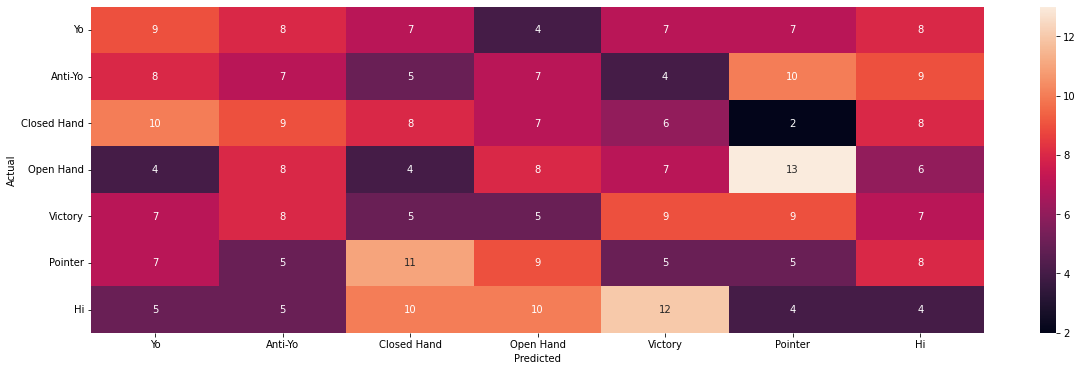

In [196]:
cm = confusion_matrix(y_train, y_test)

fig, ax = plt.subplots(figsize=(20,6))
sns.heatmap(cm, annot = True, fmt = 'd', xticklabels = actions, yticklabels = actions)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Confusion-matrix of test case

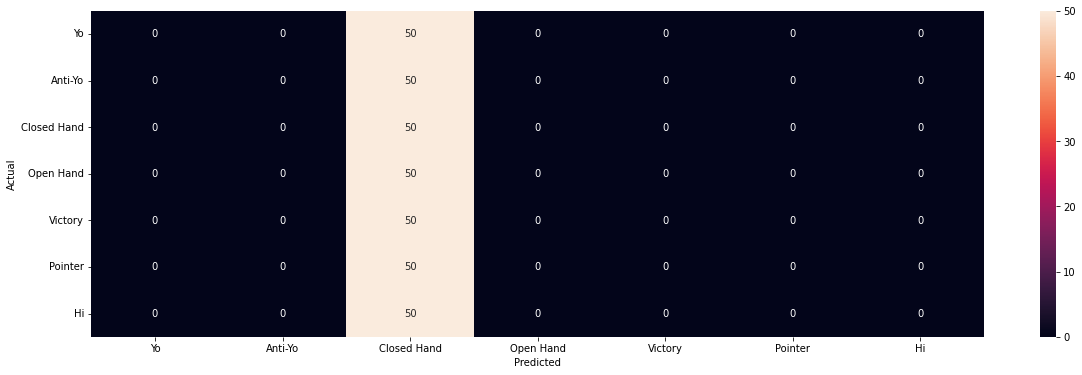

In [197]:
x_trial = [[0, 1, 2, 3]]  # Voltage matrix corresponding to Victory-like Gesture
cm = confusion_matrix(y_train, predict_array(x_trial, y_test))

fig, ax = plt.subplots(figsize=(20,6))
sns.heatmap(cm, annot = True, fmt = 'd', xticklabels = actions, yticklabels = actions)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Classification report and Accuracies of model

In [198]:
print("Learning score: ", model.score(x_train, y_train))
print("Predictive score: ", model.score(x_test, y_test))
print("Classification Report: ")
print(classification_report(y, y_pred))

Learning score:  1.0
Predictive score:  0.9942857142857143
Classification Report: 
              precision    recall  f1-score   support

     Anti-Yo       1.00      0.98      0.99       100
 Closed Hand       0.98      1.00      0.99       100
          Hi       1.00      1.00      1.00       100
   Open Hand       1.00      1.00      1.00       100
     Pointer       1.00      1.00      1.00       100
     Victory       1.00      1.00      1.00       100
          Yo       1.00      1.00      1.00       100

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700

